In [81]:
# Librerías estándar
import pandas as pd
import numpy as np
import re

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Procesamiento de lenguaje natural con NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

# Otras utilidades
from pandas_profiling import ProfileReport

# Descarga de recursos de NLTK y definición de stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Cargar datos
data = pd.read_excel('cat_345.xlsx')
print(data[data['Textos_espanol'].str.contains("Claramente, hay muchos otros factores")])


                                      Textos_espanol  sdg
2  Claramente, hay muchos otros factores en juego...    3


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
print(data)

                                         Textos_espanol  sdg
0     Por ejemplo, el nÃºmero de consultas externas ...    3
1     En 2007, el gobierno central financió directam...    3
2     Claramente, hay muchos otros factores en juego...    3
3     Por ejemplo, el estado australiano de Victoria...    3
4     El consumo anual de alcohol se estima en 15,7 ...    3
...                                                 ...  ...
2995  Un caucus efectivo se basa en fuertes vínculos...    5
2996  Por el contrario, el porcentaje de hogares en ...    5
2997  El análisis utilizará una gama de medidas que ...    5
2998  La capacitación económica, el apoyo y, a veces...    5
2999  Esto ha sido reconocido por los comitÃ©s en la...    5

[3000 rows x 2 columns]


In [5]:
profile = ProfileReport(data, title="Reporte de pandas profiling")
profile.to_notebook_iframe()




In [8]:
print('hola')

hola


In [26]:
print(data)

                                         Textos_espanol  sdg
0     Por ejemplo, el nÃºmero de consultas externas ...    3
1     En 2007, el gobierno central financió directam...    3
2     Claramente, hay muchos otros factores en juego...    3
3     Por ejemplo, el estado australiano de Victoria...    3
4     El consumo anual de alcohol se estima en 15,7 ...    3
...                                                 ...  ...
2995  Un caucus efectivo se basa en fuertes vínculos...    5
2996  Por el contrario, el porcentaje de hogares en ...    5
2997  El análisis utilizará una gama de medidas que ...    5
2998  La capacitación económica, el apoyo y, a veces...    5
2999  Esto ha sido reconocido por los comitÃ©s en la...    5

[3000 rows x 2 columns]


### Se evidencia que hay simbolos no reconocidos, asi que por seguridad del modelo, decidimos eliminarlos

In [50]:
def procesar_texto(texto):
    tokens = word_tokenize(texto.lower())
    
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    return filtered_tokens


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

data['tokens'] = data['Textos_espanol'].apply(procesar_texto)

print(data['tokens'])


0       [ejemplo, nãºmero, consultas, externas, especi...
1       [2007, gobierno, central, financió, directamen...
2       [claramente, factores, juego, particular, vari...
3       [ejemplo, australiano, victoria, creó, agencia...
4       [consumo, anual, alcohol, estima, litros, año,...
                              ...                        
2995    [caucus, efectivo, basa, fuertes, vínculos, gr...
2996    [contrario, porcentaje, hogares, edad, trabaja...
2997    [análisis, utilizará, gama, medidas, reflejen,...
2998    [capacitación, económica, apoyo, veces, incent...
2999    [sido, reconocido, atenciã³n, prestada, salud,...
Name: tokens, Length: 3000, dtype: object


In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargando las stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Definiendo las stopwords
stop_words = set(stopwords.words('spanish'))

def tokenize_and_clean(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

vectorizer = CountVectorizer(tokenizer=tokenize_and_clean, max_features=10000)
X = vectorizer.fit_transform(data['Textos_espanol'])
y = data['sdg']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
print(X)

  (0, 3416)	1
  (0, 6306)	2
  (0, 2204)	1
  (0, 4110)	1
  (0, 3751)	1
  (0, 1432)	2
  (0, 5930)	2
  (0, 2804)	2
  (0, 8931)	3
  (0, 1892)	2
  (0, 182)	1
  (0, 4875)	2
  (0, 5340)	2
  (0, 8383)	1
  (0, 8761)	1
  (0, 1326)	1
  (0, 3049)	1
  (0, 7863)	2
  (0, 8144)	1
  (0, 6165)	1
  (0, 2926)	1
  (0, 7105)	1
  (0, 5555)	1
  (0, 5799)	1
  (0, 5417)	1
  :	:
  (2999, 6649)	1
  (2999, 5020)	1
  (2999, 525)	1
  (2999, 7479)	1
  (2999, 8864)	1
  (2999, 3478)	1
  (2999, 8065)	1
  (2999, 3953)	1
  (2999, 4784)	1
  (2999, 305)	1
  (2999, 6769)	1
  (2999, 2896)	1
  (2999, 8071)	1
  (2999, 8909)	1
  (2999, 4010)	1
  (2999, 1746)	1
  (2999, 7433)	1
  (2999, 518)	1
  (2999, 7759)	1
  (2999, 5790)	1
  (2999, 6143)	1
  (2999, 8325)	1
  (2999, 7181)	1
  (2999, 7010)	1
  (2999, 1000)	1


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 93.17%

Classification Report:
               precision    recall  f1-score   support

           3       0.91      0.92      0.91       217
           4       0.96      0.95      0.96       197
           5       0.92      0.92      0.92       186

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


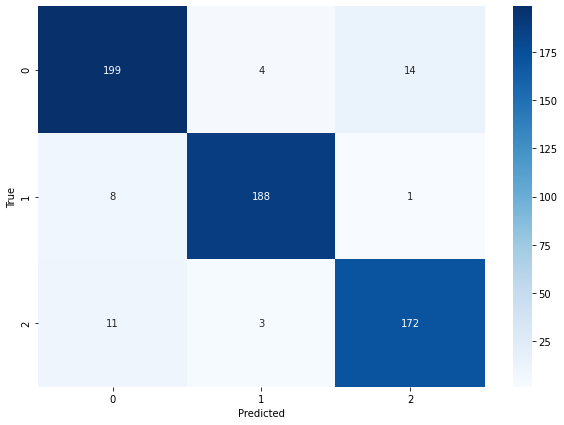

In [67]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


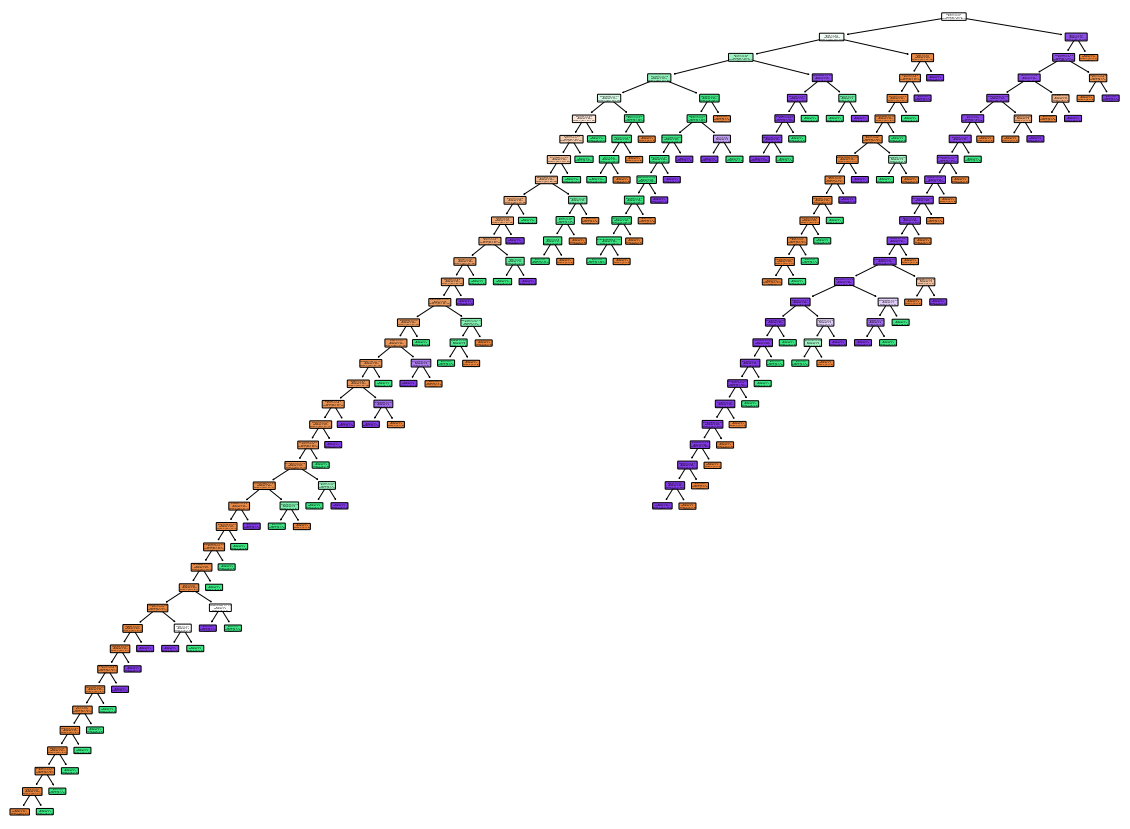

In [69]:
plt.figure(figsize=(20,15))
plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names(), class_names=str(clf.classes_), rounded=True)
plt.show()


In [80]:

texto_prueba = ["La buena salud y el bienestar son fundamentales para un desarrollo sostenible y una vida plena"]

texto_prueba_transformado = vectorizer.transform(texto_prueba)


prediccion = clf.predict(texto_prueba_transformado)

print(f"El modelo ha clasificado el texto de prueba en la categoría: {prediccion[0]}")


El modelo ha clasificado el texto de prueba en la categoría: 3
